# Gaussian Processes are Not So Fancy

Code and plots for https://planspace.org/20181226-gaussian_processes_are_not_so_fancy/

In [1]:
train_X = [[0.8], [1.2], [3.8], [4.2]]
train_y = [   3,     4,    -2,    -2 ]

In [2]:
import matplotlib.pyplot as plt

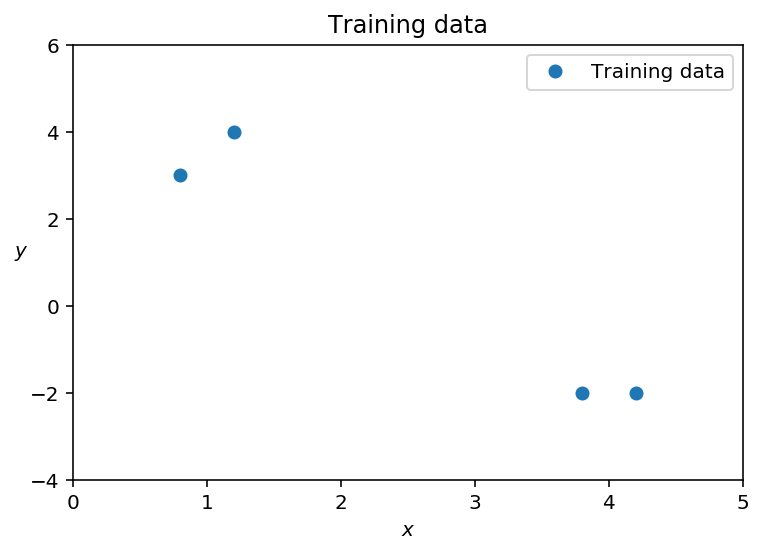

In [3]:
training_data, = plt.plot(train_X, train_y, 'o', label='Training data')
plt.xlim([0, 5])
plt.ylim([-4, 6])
plt.title('Training data')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(handles=[training_data], loc='upper right')
plt.savefig('img/training_data.png')

In [4]:
import sklearn.metrics

In [5]:
dist_XX = sklearn.metrics.pairwise_distances(train_X)
dist_XX

array([[0. , 0.4, 3. , 3.4],
       [0.4, 0. , 2.6, 3. ],
       [3. , 2.6, 0. , 0.4],
       [3.4, 3. , 0.4, 0. ]])

In [6]:
import numpy as np

In [7]:
def squared_exponential(distance):
    return np.exp(distance**2 / -2)

In [8]:
kern_XX = squared_exponential(dist_XX)
kern_XX.round(2)

array([[1.  , 0.92, 0.01, 0.  ],
       [0.92, 1.  , 0.03, 0.01],
       [0.01, 0.03, 1.  , 0.92],
       [0.  , 0.01, 0.92, 1.  ]])

In [9]:
test_X = [[1]]

In [10]:
kern_xX = squared_exponential(
              sklearn.metrics.pairwise_distances(test_X, train_X))
kern_xX

array([[0.98019867, 0.98019867, 0.01984109, 0.00597602]])

In [11]:
kern_xX.dot(np.linalg.inv(kern_XX))

array([[ 0.50835358,  0.51127124, -0.01378216,  0.01144869]])

In [12]:
test_y = kern_xX.dot(np.linalg.inv(kern_XX)).dot(train_y)[0]
round(test_y, 2)

3.57

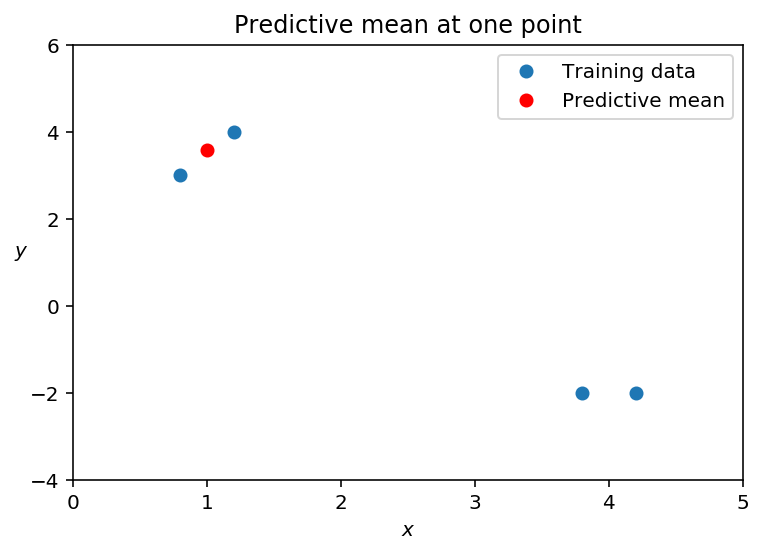

In [13]:
training_data, = plt.plot(train_X, train_y, 'o', label='Training data')
predictive_mean, = plt.plot(test_X, test_y, 'o', color='red', label='Predictive mean')
plt.xlim([0, 5])
plt.ylim([-4, 6])
plt.title('Predictive mean at one point')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(handles=[training_data, predictive_mean], loc='upper right')
plt.savefig('img/predictive_mean_at_one_point.png')

In [14]:
test_X = np.linspace(0, 5, 101).reshape([-1, 1])
kern_xX = squared_exponential(
              sklearn.metrics.pairwise_distances(test_X, train_X))
test_y = kern_xX.dot(np.linalg.inv(kern_XX)).dot(train_y)

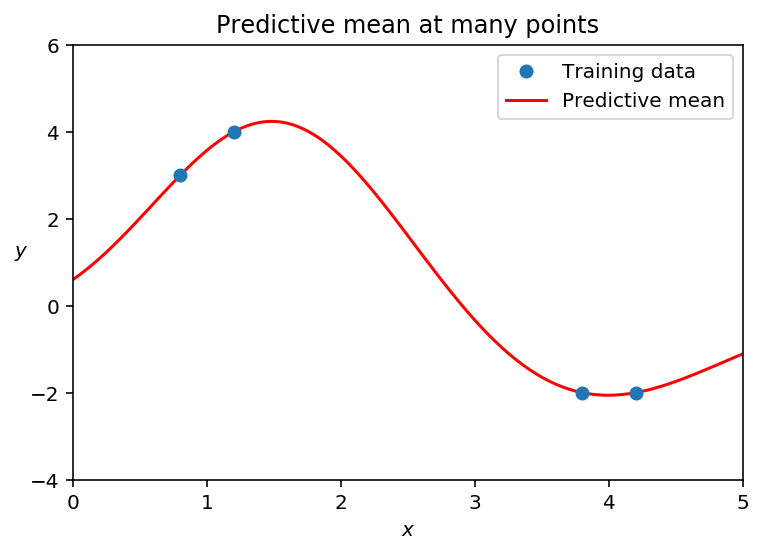

In [15]:
predictive_mean, = plt.plot(test_X, test_y, '-', color='red', label='Predictive mean')
training_data, = plt.plot(train_X, train_y, 'o', label='Training data')
plt.xlim([0, 5])
plt.ylim([-4, 6])
plt.title('Predictive mean at many points')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(handles=[training_data, predictive_mean], loc='upper right')
plt.savefig('img/predictive_mean_at_many_points.png')

In [16]:
kern_xx = squared_exponential(
              sklearn.metrics.pairwise_distances(test_X, test_X))
kern_Xx = squared_exponential(
              sklearn.metrics.pairwise_distances(train_X, test_X))
test_cov = kern_xx - kern_xX.dot(np.linalg.inv(kern_XX)).dot(kern_Xx)
test_error = 2 * abs(test_cov.diagonal())**0.5

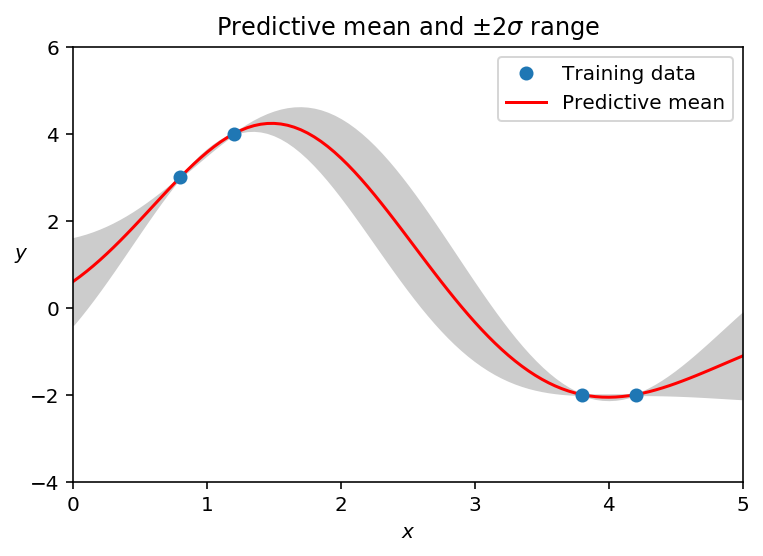

In [17]:
predictive_mean, = plt.plot(test_X, test_y, '-', color='red', label='Predictive mean')
training_data, = plt.plot(train_X, train_y, 'o', label='Training data')
plt.fill_between(test_X.ravel(), test_y - test_error, test_y + test_error, color='#CCCCCC')
plt.xlim([0, 5])
plt.ylim([-4, 6])
plt.title('Predictive mean and $\pm2\sigma$ range')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(handles=[training_data, predictive_mean], loc='upper right')
plt.savefig('img/predictive_mean_and_range.png')

In [18]:
test_X = np.linspace(-5, 10, 1001).reshape([-1, 1])
kern_xX = squared_exponential(
              sklearn.metrics.pairwise_distances(test_X, train_X))
test_y = kern_xX.dot(np.linalg.inv(kern_XX)).dot(train_y)
kern_xx = squared_exponential(
              sklearn.metrics.pairwise_distances(test_X, test_X))
kern_Xx = squared_exponential(
              sklearn.metrics.pairwise_distances(train_X, test_X))
test_cov = kern_xx - kern_xX.dot(np.linalg.inv(kern_XX)).dot(kern_Xx)
test_error = 2 * abs(test_cov.diagonal())**0.5

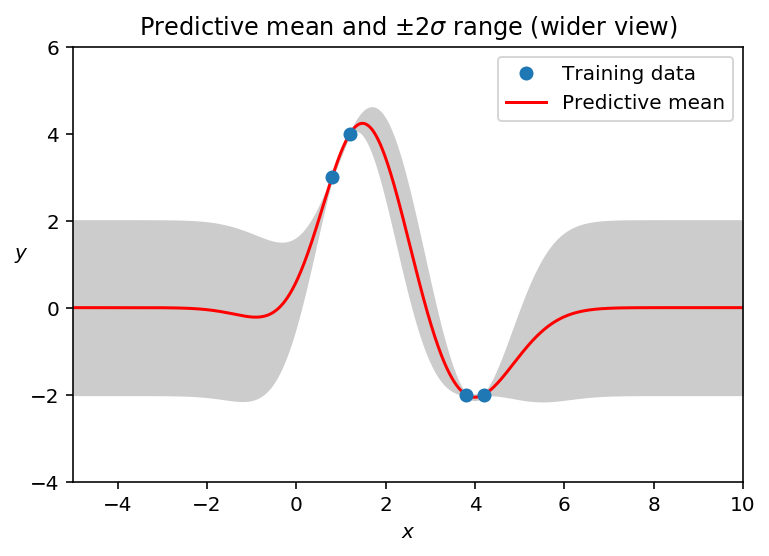

In [19]:
predictive_mean, = plt.plot(test_X, test_y, '-', color='red', label='Predictive mean')
training_data, = plt.plot(train_X, train_y, 'o', label='Training data')
plt.fill_between(test_X.ravel(), test_y - test_error, test_y + test_error, color='#CCCCCC')
plt.xlim([-5, 10])
plt.ylim([-4, 6])
plt.title('Predictive mean and $\pm2\sigma$ range (wider view)')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(handles=[training_data, predictive_mean], loc='upper right')
plt.savefig('img/predictive_mean_and_range_wider_view.png')

In [20]:
def squared_exponential(distance, length_scale=1):
    return np.exp((distance / length_scale)**2 / -2)

In [21]:
length_scale = 0.05
kern_XX = squared_exponential(dist_XX, length_scale=length_scale)
test_X = np.linspace(0, 5, 1001).reshape([-1, 1])
kern_xX = squared_exponential(
              sklearn.metrics.pairwise_distances(test_X, train_X),
              length_scale=length_scale)
test_y = kern_xX.dot(np.linalg.inv(kern_XX)).dot(train_y)

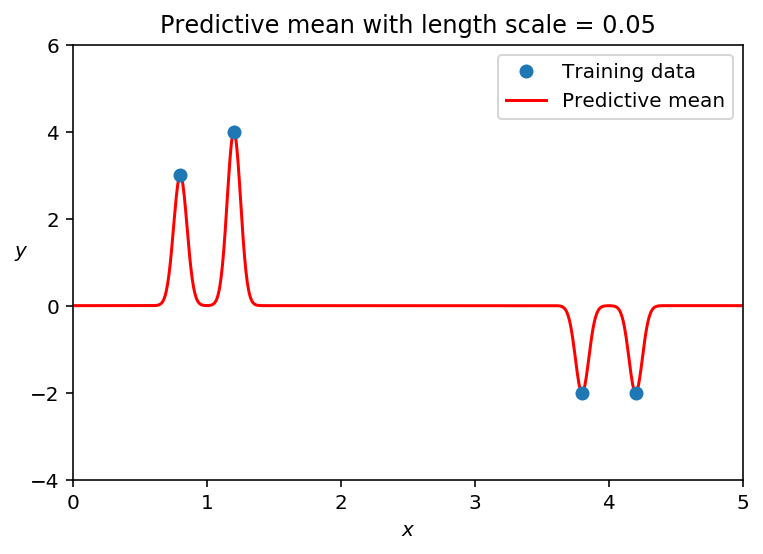

In [22]:
predictive_mean, = plt.plot(test_X, test_y, '-', color='red', label='Predictive mean')
training_data, = plt.plot(train_X, train_y, 'o', label='Training data')
plt.xlim([0, 5])
plt.ylim([-4, 6])
plt.title('Predictive mean with length scale = 0.05')
plt.xlabel('$x$')
plt.ylabel('$y$', rotation=0)
plt.legend(handles=[training_data, predictive_mean], loc='upper right')
plt.savefig('img/predictive_mean_with_small_length_scale.png')